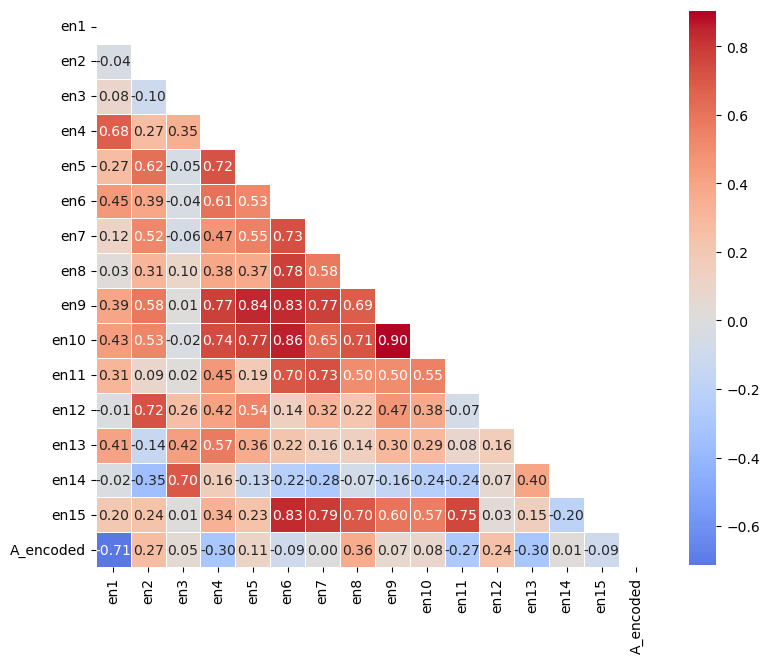

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/data-923.csv')
#df = df.drop(columns=['num'])

label_encoder = LabelEncoder()
df['A_encoded'] = label_encoder.fit_transform(df['cate'])

# 选择需要保证化的列
cols_to_normalize = ['en1', 'en2', 'en3','en4','en5','en6','en7','en8','en9','en10','en11','en12','en13','en14','en15']
# 使用MinMaxScaler进行保证化
scaler = MinMaxScaler()
#df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

cols = ['en1', 'en2', 'en3','en4','en5','en6','en7','en8','en9','en10','en11','en12','en13','en14','en15','A_encoded']
data = df[cols]

# 计算相关性矩阵
corrmat = data.corr()

# 创建一个掩码以隐藏对角线上的值
mask = np.zeros_like(corrmat, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# 设置图形和轴的大小
f, ax = plt.subplots(figsize=(9, 9))

# 使用热图可视化相关性矩阵
sns.heatmap(corrmat, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

# 显示图形
plt.show()


In [13]:
data.describe()

,en1,en2,en3,en4,en5,en6,en7,A_encoded
count,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,78.000000
mean,-2.761324e-16,2.589809e-15,1.651101e-16,1.545772e-15,-2.024022e-15,1.803401e-15,4.341257e-16,6.000000
std,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,3.765875
min,-1.569864e+00,-1.492597e+00,-1.978730e+00,-2.265784e+00,-2.425700e+00,-2.697175e+00,-2.533832e+00,0.000000
25%,-8.142003e-01,-4.419247e-01,-6.248621e-01,-6.445538e-01,-3.437832e-01,-4.587408e-01,-5.882783e-01,3.000000
50%,-4.092667e-01,-7.823052e-02,-3.063049e-01,-3.019295e-02,1.466239e-01,2.708229e-01,1.826016e-01,6.000000
75%,1.057422e+00,2.349506e-01,1.087383e+00,7.718893e-01,8.591022e-01,7.185096e-01,7.821748e-01,9.000000
max,1.363514e+00,3.073786e+00,1.684677e+00,1.898218e+00,1.571581e+00,1.182777e+00,1.626472e+00,12.000000


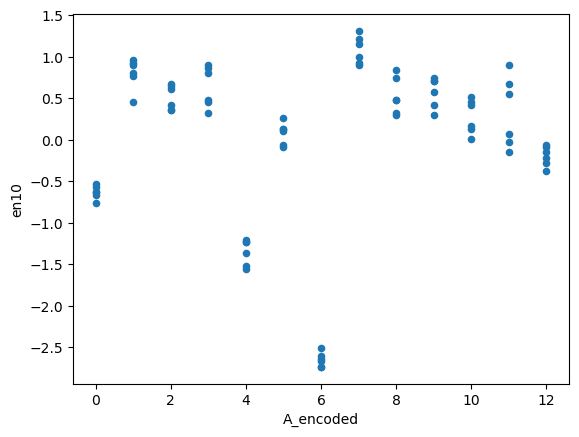

In [7]:
var = 'en10'
data_tmp = pd.concat([data[var], data['A_encoded']], axis=1)
data_tmp.plot.scatter(y=var,x='A_encoded');


In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

df = pd.read_csv('data/data-923.csv')
# df = df.drop(columns=['num'])

label_encoder = LabelEncoder()
df['A_encoded'] = label_encoder.fit_transform(df['cate'])
y = df['A_encoded']
X = df[['en1','en2','en3','en4', 'en5', 'en6', 'en7', 'en8', 'en9', 'en10', 'en11', 'en12', 'en13', 'en14', 'en15']]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42,stratify=y)

# 定义分类器及其参数
classifiers = {
    'DecisionTree': DecisionTreeClassifier(criterion='entropy',random_state=42),
    # SVM 支持多种核函数，包括线性核（linear）、多项式核（poly）、径向基函数（RBF，rbf）和sigmoid核。对于非线性问题，通常使用非线性核函数，RBF 是最常用的选择。
    # 'SVM': SVC(probability=True, kernel='rbf',random_state=42),
    # 'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors': KNeighborsClassifier(weights='distance'),
    'GaussianNB': GaussianNB(var_smoothing=1e-2),
    # 'AdaBoost': AdaBoostClassifier(learning_rate=0.1,random_state=42),
    'MLP (Neural Network)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=100,learning_rate_init=0.01, random_state=42),
    # 'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    # 'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    # 'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Extra Trees': ExtraTreesClassifier()
}

# 封装训练和评估模型的函数
def train_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = matthews_corrcoef(y_test, y_pred)

    print(f"模型：{clf.__class__.__name__}")
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Kappa Coefficient: {kappa}')
    print('------')
    
    # print(', '.join(y_test.astype(str)))
    # print(y_pred)

# 创建一个投票分类器
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='soft')

for name, clf in classifiers.items():
    train_evaluate(clf,X_train,y_train,X_test,y_test)

train_evaluate(voting_clf,X_train,y_train,X_test,y_test)


模型：DecisionTreeClassifier
Accuracy: 0.9166666666666666
Recall: 0.9230769230769231
Precision: 0.9358974358974359
F1 Score: 0.9076923076923076
Kappa Coefficient: 0.9130451096264045
------
模型：KNeighborsClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：GaussianNB
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：MLPClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：LinearDiscriminantAnalysis
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：CatBoostClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：ExtraTreesClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：VotingClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------



模型：Decision Tree
Accuracy: 0.9583333333333334; Recall: 0.9615384615384616; Precision: 0.9743589743589743; F1: 0.958974358974359; MCC(Kappa): 0.9565234481800428


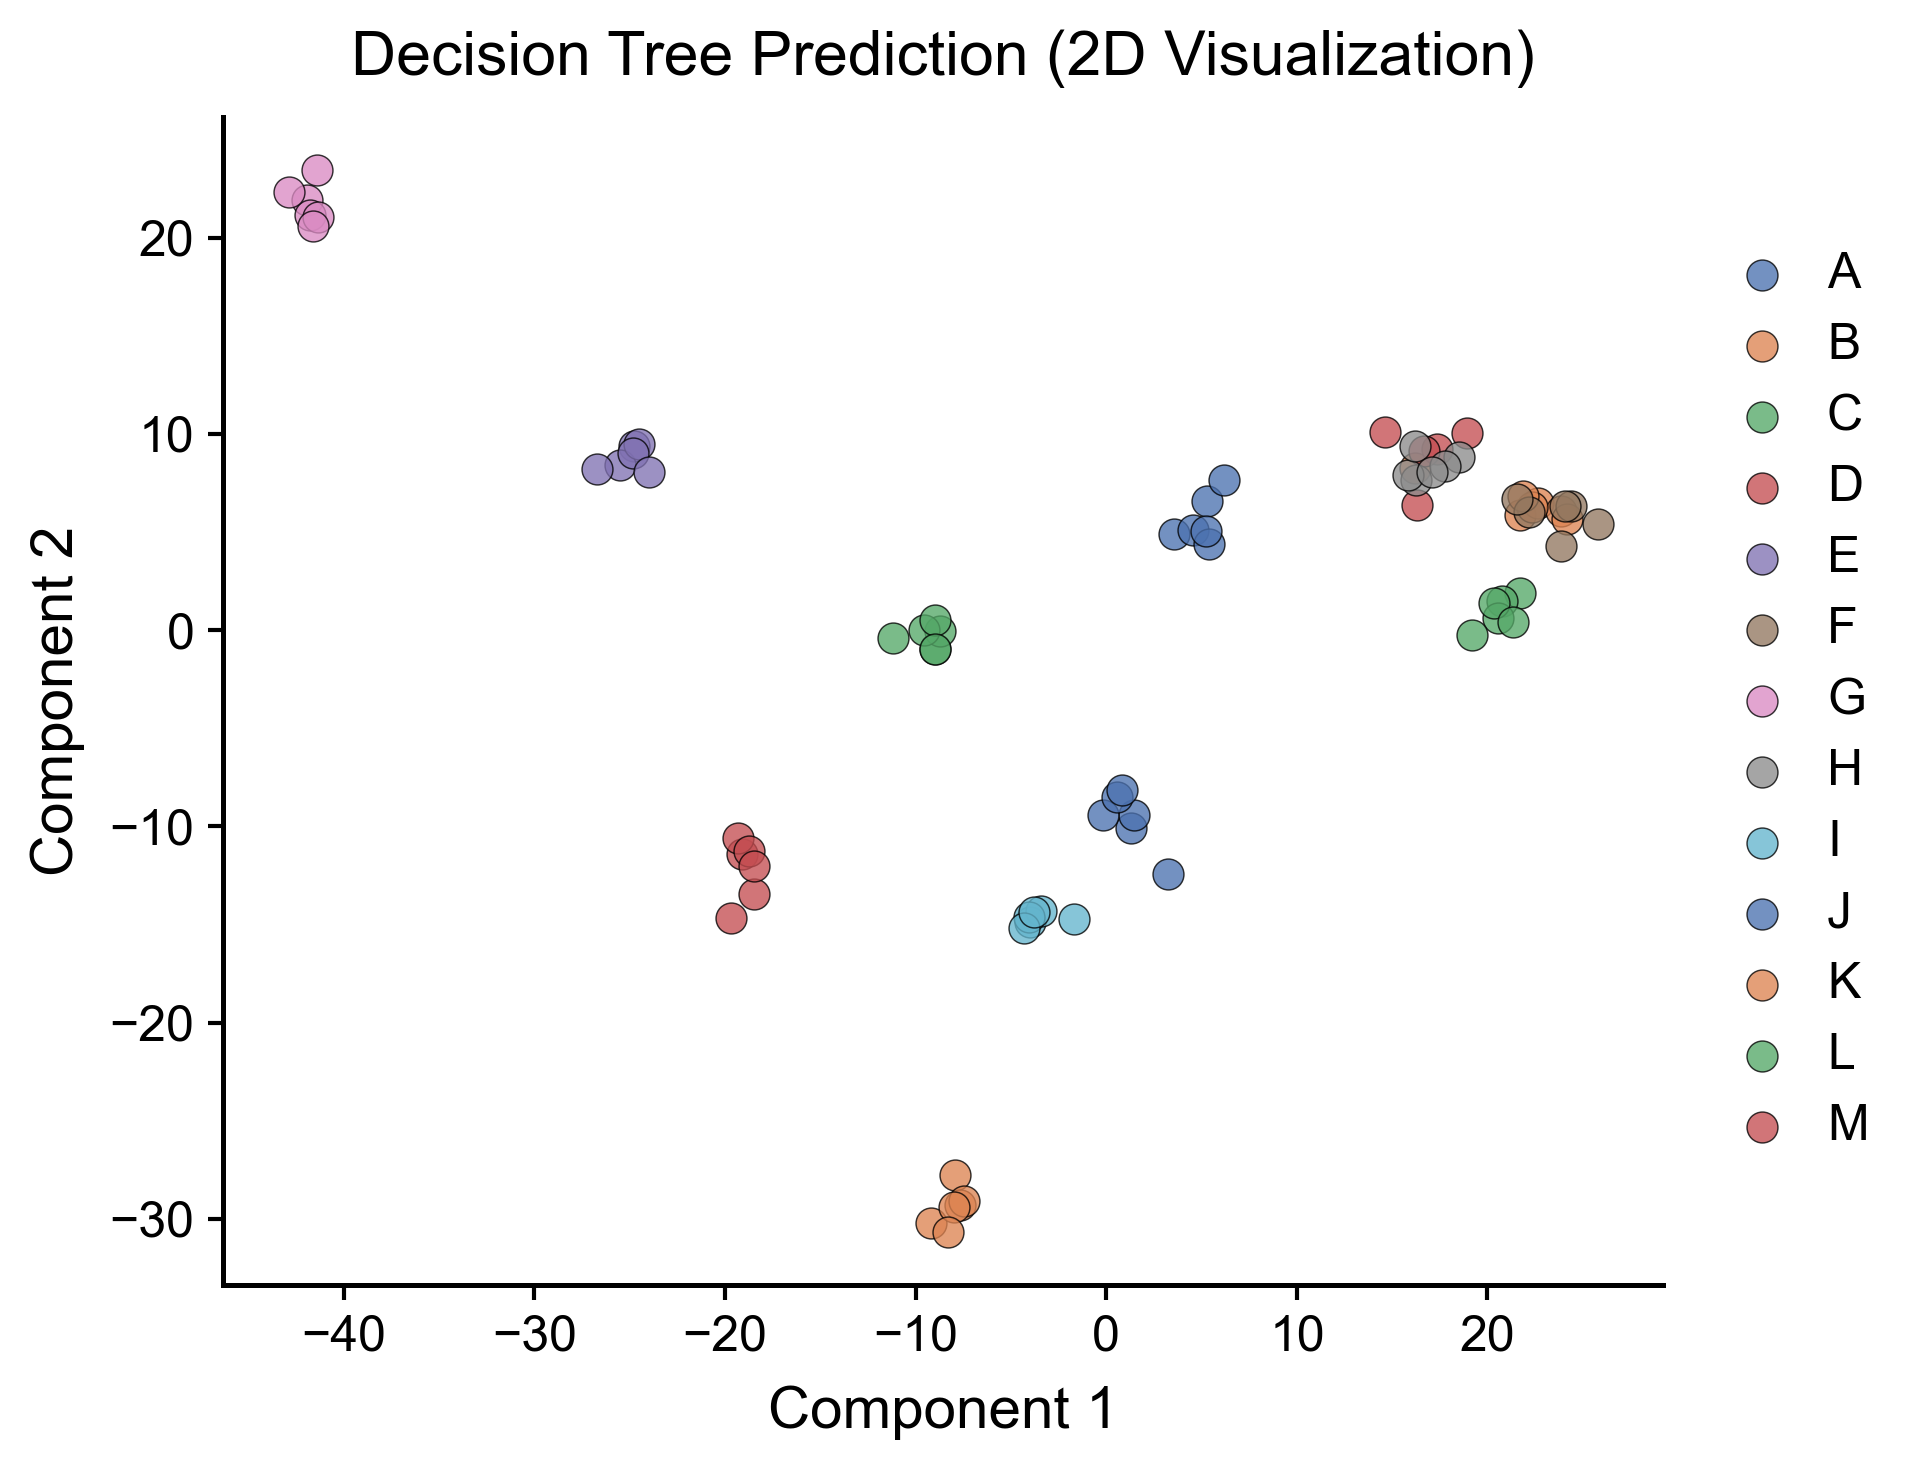


模型：Naive Bayes
Accuracy: 1.0; Recall: 1.0; Precision: 1.0; F1: 1.0; MCC(Kappa): 1.0


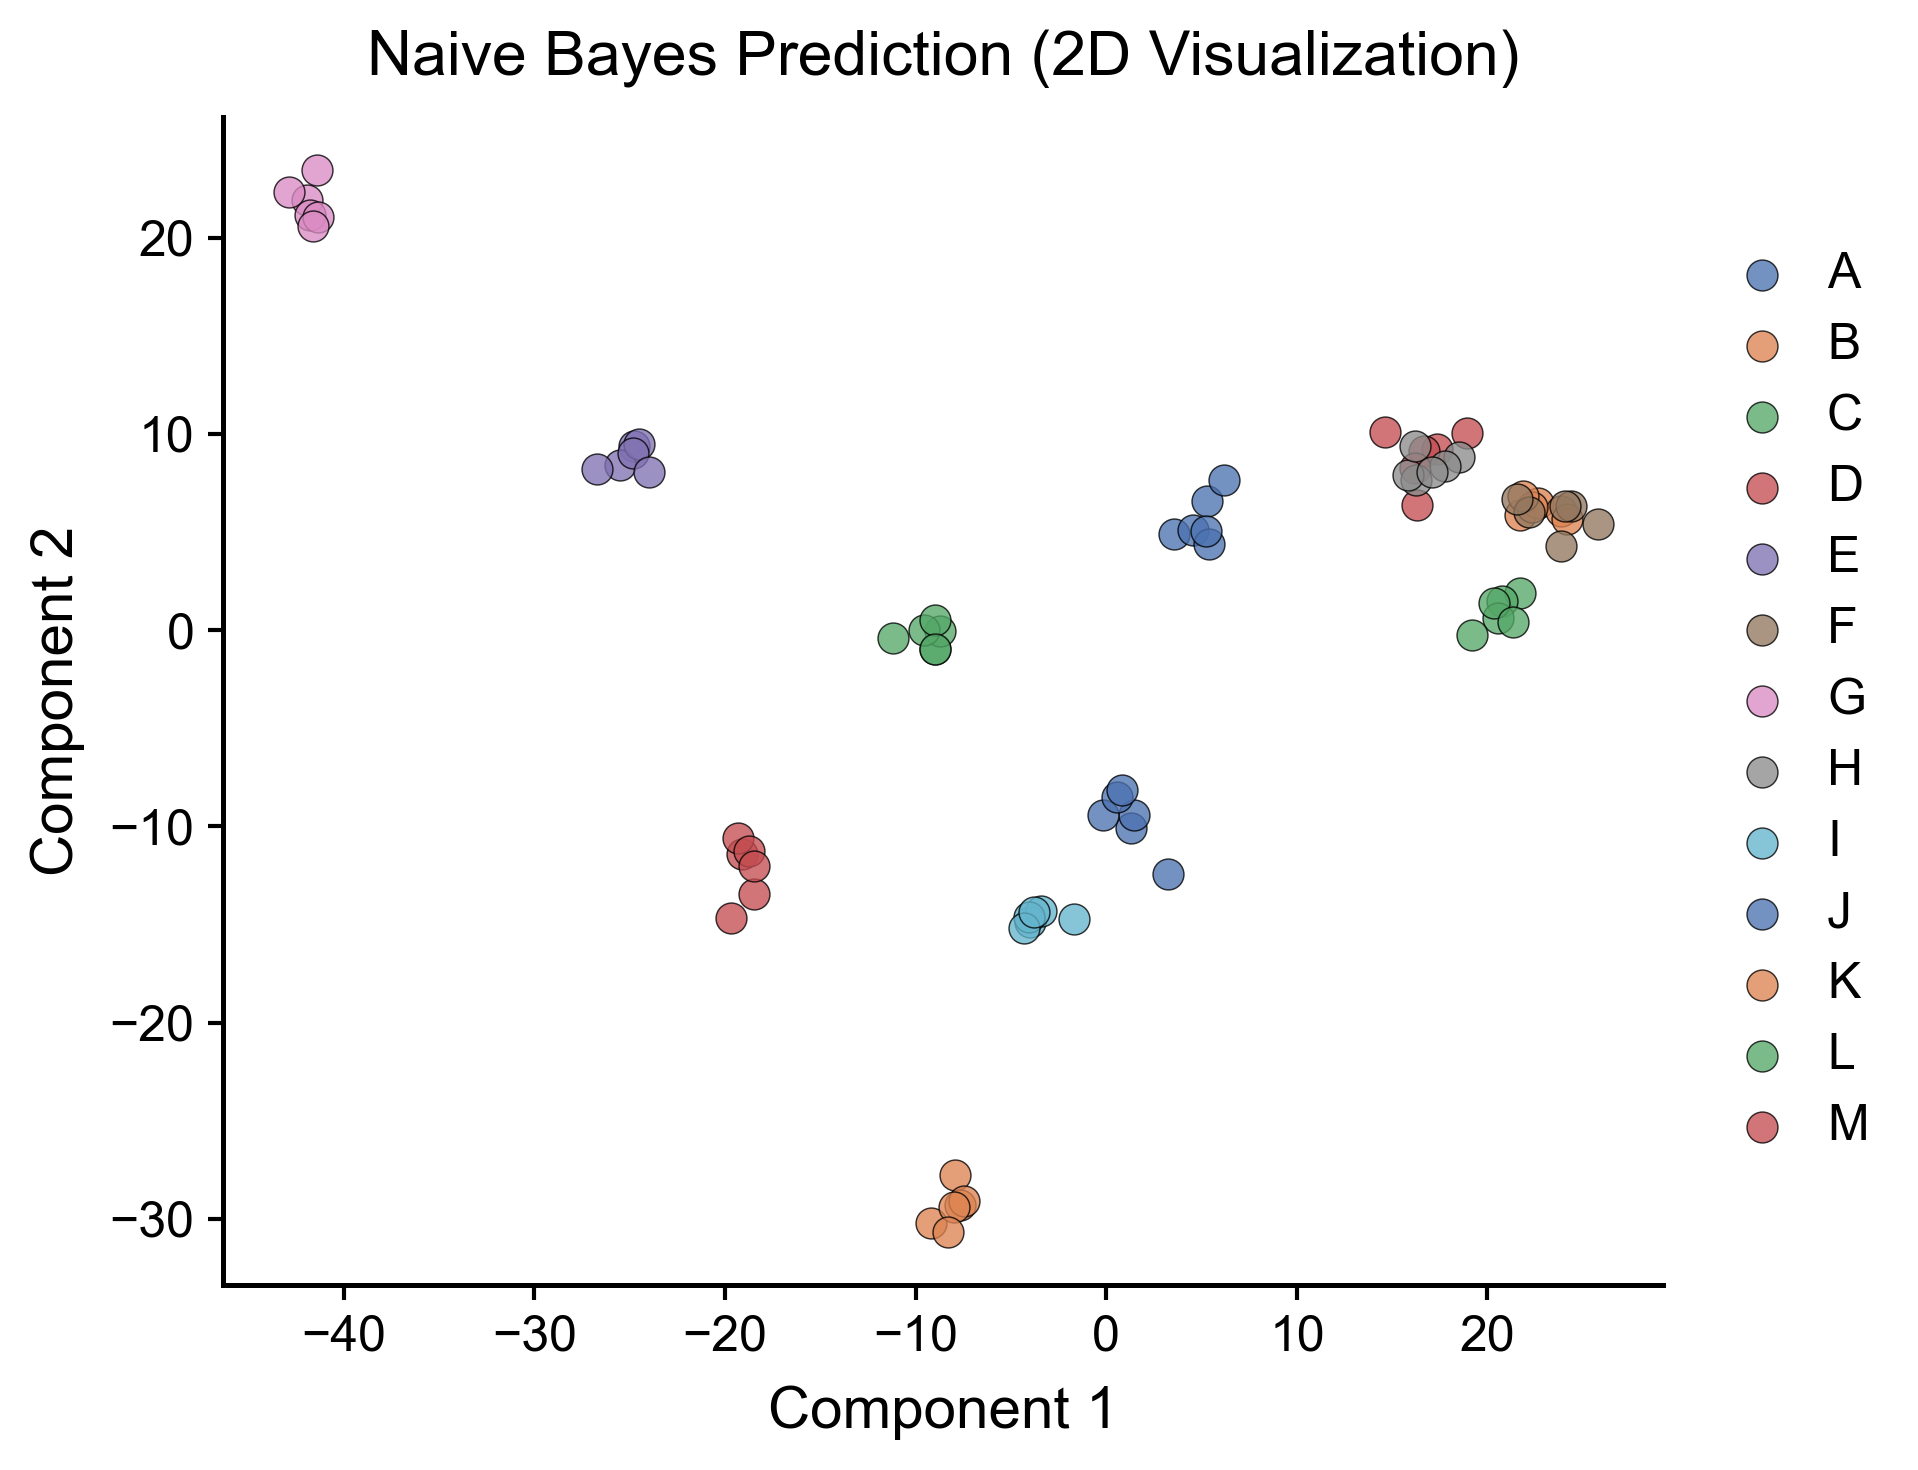

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# ============================================================
# Nature 风格可视化函数（右侧图例）
# ============================================================
def plot_nature_scatter(X2d, y_labels, title="Nature-style Plot", save_name=None):
    plt.rcParams.update({
        "font.family": "Arial",
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "axes.linewidth": 1.2,
        "axes.labelsize": 14,
        "axes.titlesize": 15,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "xtick.major.width": 1.0,
        "ytick.major.width": 1.0,
        "legend.frameon": False,
        "axes.facecolor": "white",
        "axes.edgecolor": "black",
    })

    nature_colors = [
        "#4C72B0", "#DD8452", "#55A868",
        "#C44E52", "#8172B3", "#937860",
        "#DA8BC3", "#8C8C8C", "#64B5CD"
    ]

    plt.figure(figsize=(6.5, 5))
    unique_classes = np.unique(y_labels)

    for i, cls in enumerate(unique_classes):
        idx = (y_labels == cls)
        plt.scatter(
            X2d[idx, 0], X2d[idx, 1],
            s=55, alpha=0.78,
            color=nature_colors[i % len(nature_colors)],
            edgecolor="black", linewidth=0.35,
            label=str(cls)
        )

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel("Component 1", labelpad=6)
    plt.ylabel("Component 2", labelpad=6)
    plt.title(title, pad=10)

    # 图例在右侧
    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        borderaxespad=0,
        handletextpad=0.3
    )

    plt.tight_layout()
    if save_name:
        plt.savefig(f"{save_name}.pdf", bbox_inches="tight")
        plt.savefig(f"{save_name}.svg", bbox_inches="tight")
    plt.show()


# ============================================================
# 读取数据
# ============================================================
df = pd.read_csv("data/data-923.csv")
label_encoder = LabelEncoder()
df["cate_str"] = df["cate"].astype(str)
df["cate_encoded"] = label_encoder.fit_transform(df["cate_str"])

y = df["cate_encoded"]
X = df[[f"en{i}" for i in range(1, 16)]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# PCA / LDA 降维
# ============================================================
use_lda = True  # True 使用 LDA，False 使用 PCA

if use_lda:
    # LDA 降维，最多 n_classes-1
    lda = LinearDiscriminantAnalysis(n_components= min(8, len(np.unique(y))-1))
    X_reduced = lda.fit_transform(X_scaled, y)
else:
    # PCA 降维
    pca = PCA(n_components=8)
    X_reduced = pca.fit_transform(X_scaled)

# ============================================================
# 划分训练集（全部降维后的维度用于训练）
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y, random_state=42
)

# ============================================================
# 模型列表
# ============================================================
models = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    #"KNN": KNeighborsClassifier(weights="distance"),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),
    #"MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=150, learning_rate_init=0.01),
    #"CatBoost": CatBoostClassifier(silent=True),
    #"Extra Trees": ExtraTreesClassifier()
}

# ============================================================
# 训练 + 输出指标 + 可视化（前两维）
# ============================================================
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_str = label_encoder.inverse_transform(y_pred)

    # 输出指标
    print(f"\n模型：{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}; "
          f"Recall: {recall_score(y_test, y_pred, average='macro')}; "
          f"Precision: {precision_score(y_test, y_pred, average='macro')}; "
          f"F1: {f1_score(y_test, y_pred, average='macro')}; "
          f"MCC(Kappa): {matthews_corrcoef(y_test, y_pred)}")

    # 可视化：只用降维后的前两维定义 XY
    plot_nature_scatter(
        X_reduced[:, :2],
        label_encoder.inverse_transform(clf.predict(X_reduced)),
        title=f"{name} Prediction (2D Visualization)",
        save_name=f"{name}_2D_Nature"
    )


In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import plotly.express as px
import os

# ===================== 数据加载 =====================
df = pd.read_csv("data/data-923.csv")
label_encoder = LabelEncoder()
df["cate_str"] = df["cate"].astype(str)
df["cate_encoded"] = label_encoder.fit_transform(df["cate_str"])

y = df["cate_encoded"]
X = df[[f"en{i}" for i in range(1, 16)]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===================== PCA / LDA 降维 =====================
use_lda =  True # True 使用 LDA
if use_lda:
    lda = LinearDiscriminantAnalysis(n_components=min(8, len(np.unique(y))-1))
    X_reduced = lda.fit_transform(X_scaled, y)
else:
    pca = PCA(n_components=8)
    X_reduced = pca.fit_transform(X_scaled)

# ===================== 划分训练集 =====================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y, random_state=42
)

# ===================== 模型列表 =====================
models = {
    #"Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    #"KNN": KNeighborsClassifier(weights="distance"),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),
    #"MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=150, learning_rate_init=0.01),
    #"CatBoost": CatBoostClassifier(silent=True),
    #"Extra Trees": ExtraTreesClassifier()
}

# ===================== 自定义颜色和符号 =====================
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a"
]

custom_symbols = [
    "circle","square","diamond","cross","x",
    "triangle-up","triangle-down","triangle-left","triangle-right",
    "pentagon","hexagon","star","hourglass"
]

# ===================== 输出文件夹 =====================
output_dir = "3D_Models_HTML"
os.makedirs(output_dir, exist_ok=True)

# ===================== 训练 + 输出指标 + 交互式 3D 可视化 =====================
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_str = label_encoder.inverse_transform(y_pred)

    # 输出模型指标
    print(f"\n模型：{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}; "
          f"Recall: {recall_score(y_test, y_pred, average='macro')}; "
          f"Precision: {precision_score(y_test, y_pred, average='macro')}; "
          f"F1: {f1_score(y_test, y_pred, average='macro')}; "
          f"MCC: {matthews_corrcoef(y_test, y_pred)}")

    # ===================== 交互式 3D 可视化 =====================
    df_plot = pd.DataFrame({
        "Component 1": X_reduced[:, 0],
        "Component 2": X_reduced[:, 1],
        "Component 3": X_reduced[:, 2],
        "Prediction": label_encoder.inverse_transform(clf.predict(X_reduced))
    })

    # 符号映射
    unique_classes = np.unique(df_plot["Prediction"])
    symbol_map = {cls: custom_symbols[i % len(custom_symbols)] for i, cls in enumerate(unique_classes)}

    fig = px.scatter_3d(
        df_plot,
        x="Component 1",
        y="Component 2",
        z="Component 3",
        color="Prediction",      # 用颜色区分类别
        symbol=None,             # 不指定符号
        color_discrete_sequence=custom_colors, 
        size_max=8,
        opacity=0.85,
        width=1200,
        height=900
    )

    fig.update_layout(
        title=f"{name} Prediction (13-class Interactive 3D)",
        legend=dict(x=1.05, y=0.5),
        scene=dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        )
    )

    # 显示交互式图表
    fig.show()

    # 保存 HTML 文件
    html_file = os.path.join(output_dir, f"{name}_3D_Prediction.html")
    fig.write_html(html_file)
    print(f"Saved interactive 3D HTML: {html_file}")



模型：Naive Bayes
Accuracy: 1.0; Recall: 1.0; Precision: 1.0; F1: 1.0; MCC: 1.0


Saved interactive 3D HTML: 3D_Models_HTML/Naive Bayes_3D_Prediction.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

# ===================== 自定义颜色 =====================
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a"
]

# ===================== 数据读取与预处理 =====================
df = pd.read_csv("data/data-923.csv")
cols = [f"en{i}" for i in range(1,16)]
X = df[cols].values
y_raw = df["cate"].astype(str).values
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = le.classes_
n_classes = len(class_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_true, all_y_pred, all_y_prob = [], [], []

for train_idx, test_idx in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    lda = LinearDiscriminantAnalysis(n_components=n_classes-1)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    model = GaussianNB()
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    y_prob = model.predict_proba(X_test_lda)

    all_y_true.append(y_test)
    all_y_pred.append(y_pred)
    all_y_prob.append(y_prob)

y_true_all = np.concatenate(all_y_true)
y_pred_all = np.concatenate(all_y_pred)
y_prob_all = np.concatenate(all_y_prob)




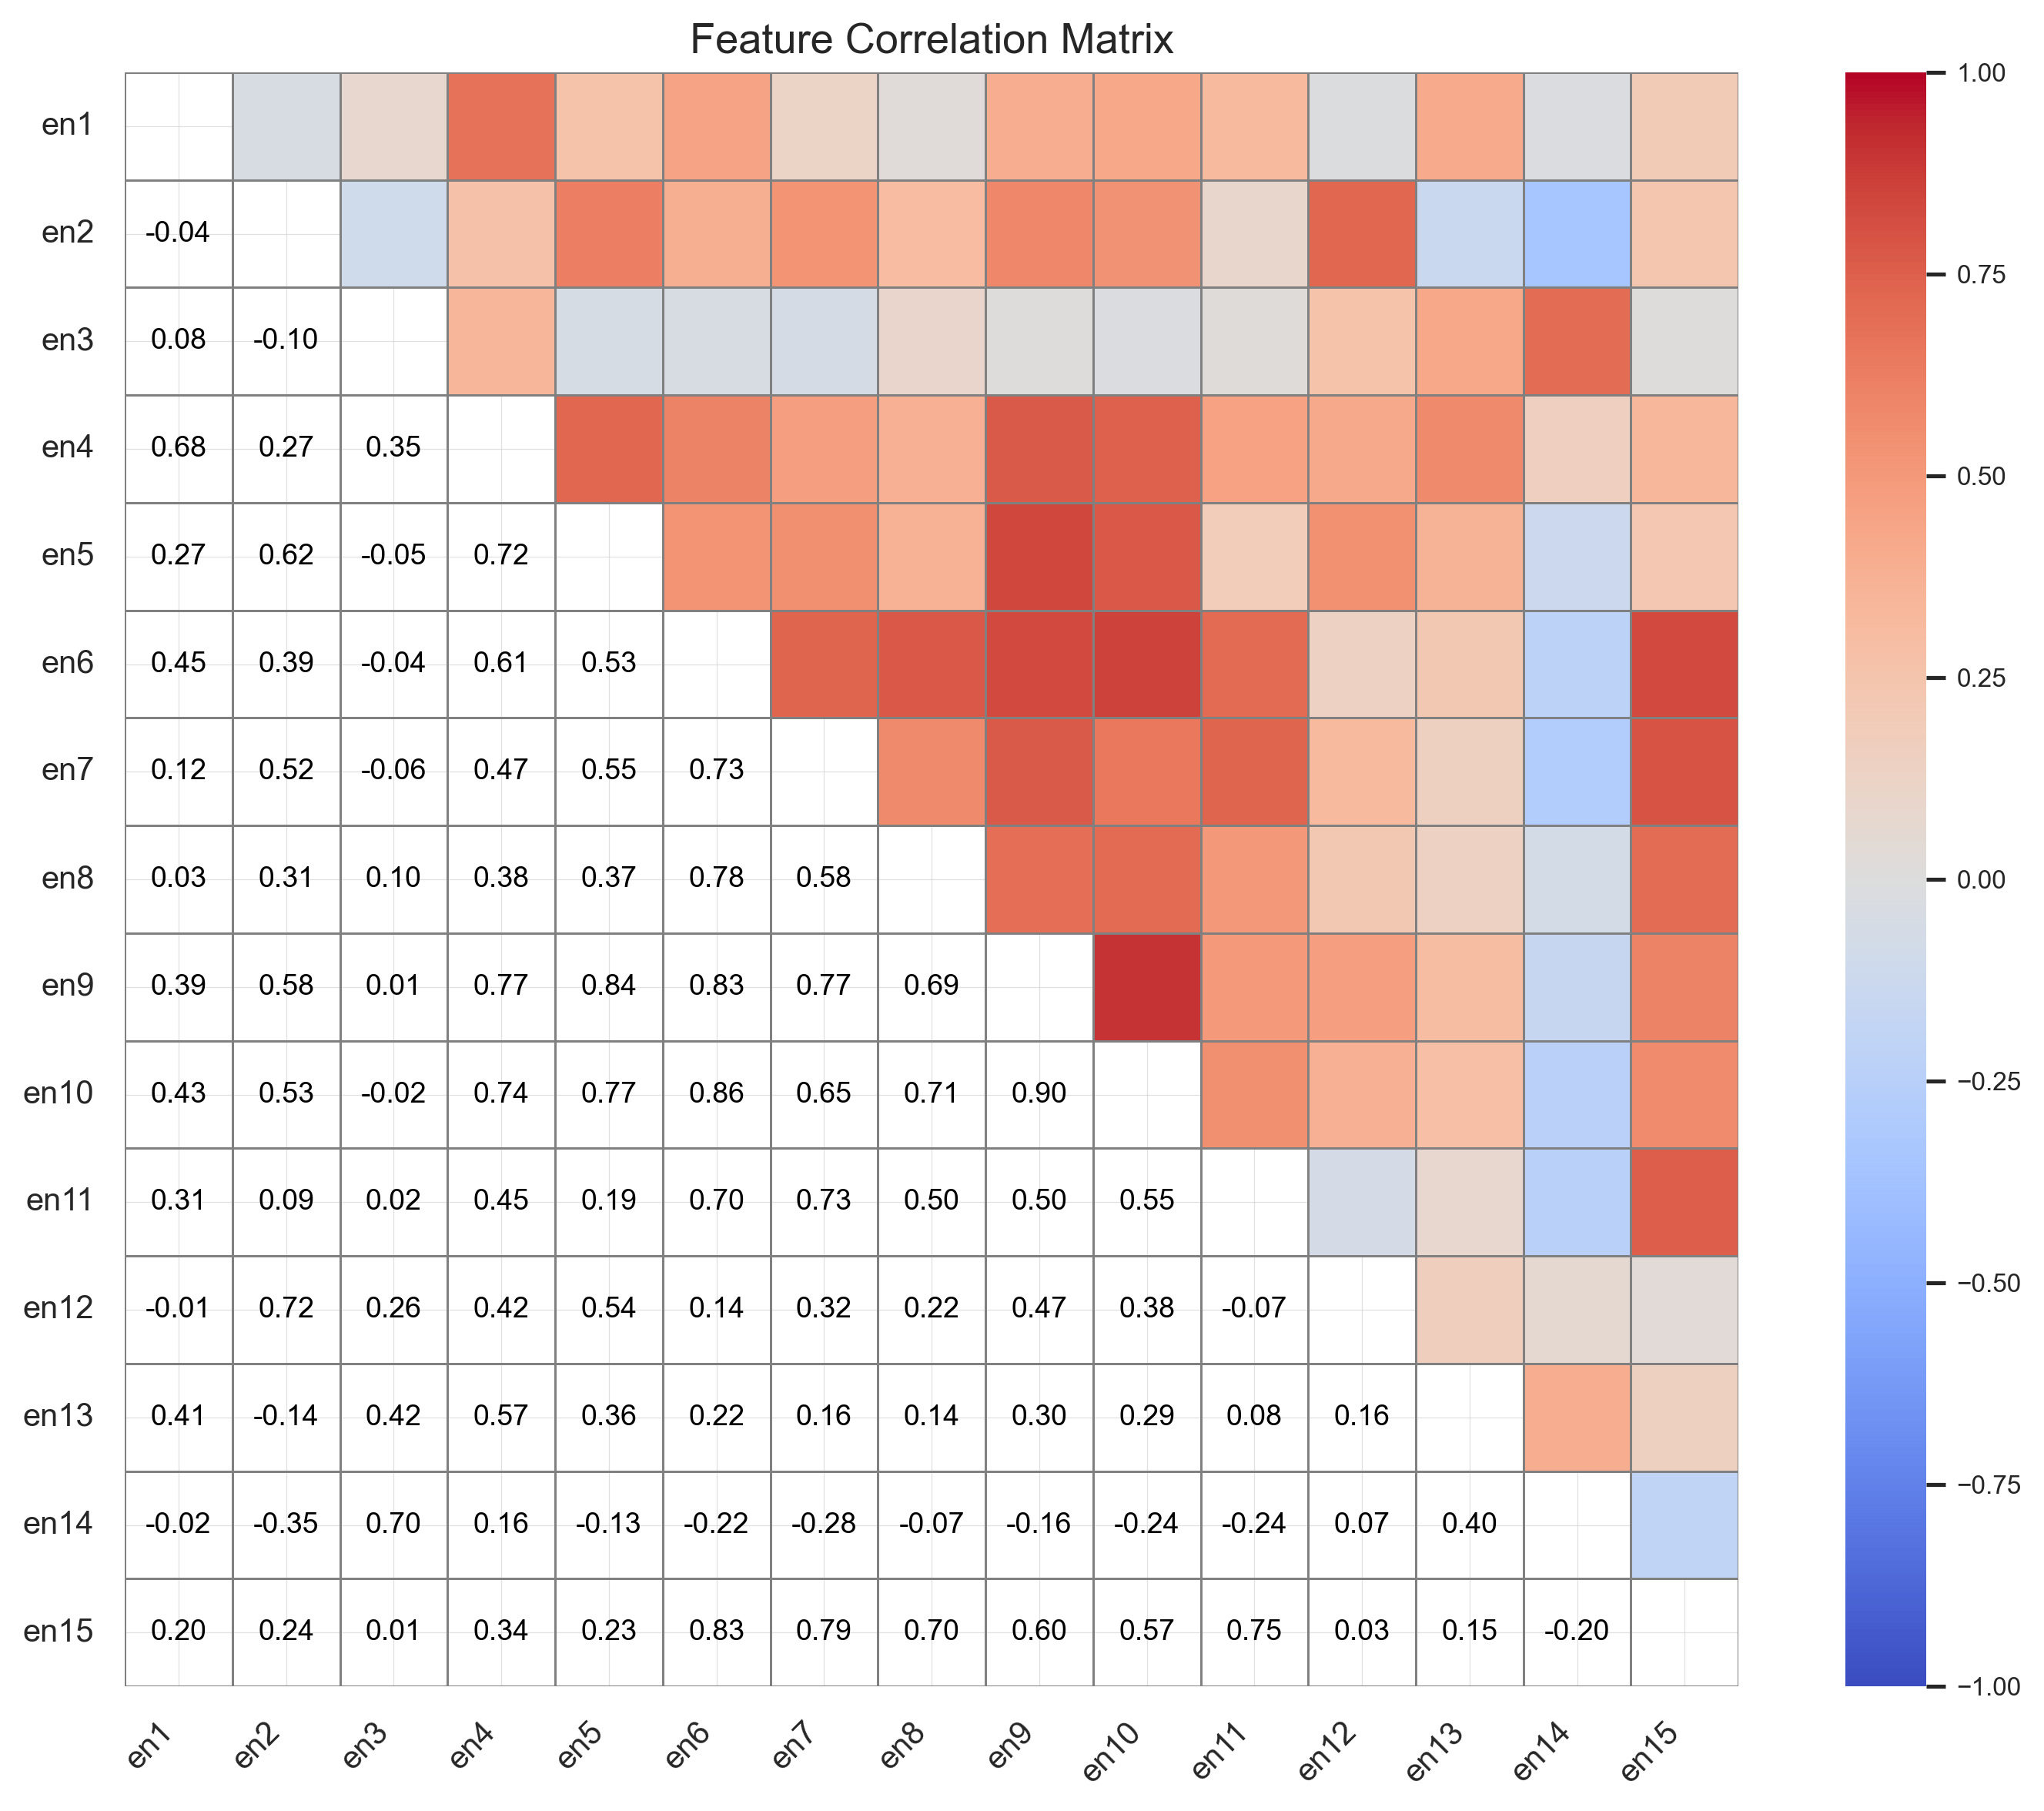

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 特征数据
cols = [f"en{i}" for i in range(1,16)]
X_df = df[cols]

# 相关系数矩阵
corr_matrix = X_df.corr()

# 创建一个 mask，只显示上三角的颜色
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

fig, ax = plt.subplots(figsize=(10,8))

# 上三角热力图（颜色）
sns.heatmap(
    corr_matrix,
    mask=~mask,            # 上三角
    annot=False,           # 不显示数字
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar=True,
    linewidths=0.3,
    linecolor='gray',
    square=True,
    ax=ax
)

# 下三角数字显示
for i in range(corr_matrix.shape[0]):
    for j in range(i):
        ax.text(j+0.5, i+0.5,
                f"{corr_matrix.iloc[i,j]:.2f}",
                ha='center', va='center', fontsize=9, color='black')

# 坐标轴和标题
ax.set_xticks(np.arange(corr_matrix.shape[0])+0.5)
ax.set_yticks(np.arange(corr_matrix.shape[0])+0.5)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, rotation=0, fontsize=10)
ax.set_title("Feature Correlation Matrix", fontsize=13)

# 极细边框
for spine in ax.spines.values():
    spine.set_linewidth(0.3)

ax.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)

plt.tight_layout()
plt.savefig("Feature_Correlation_Matrix_Professional.pdf", dpi=300)
plt.show()


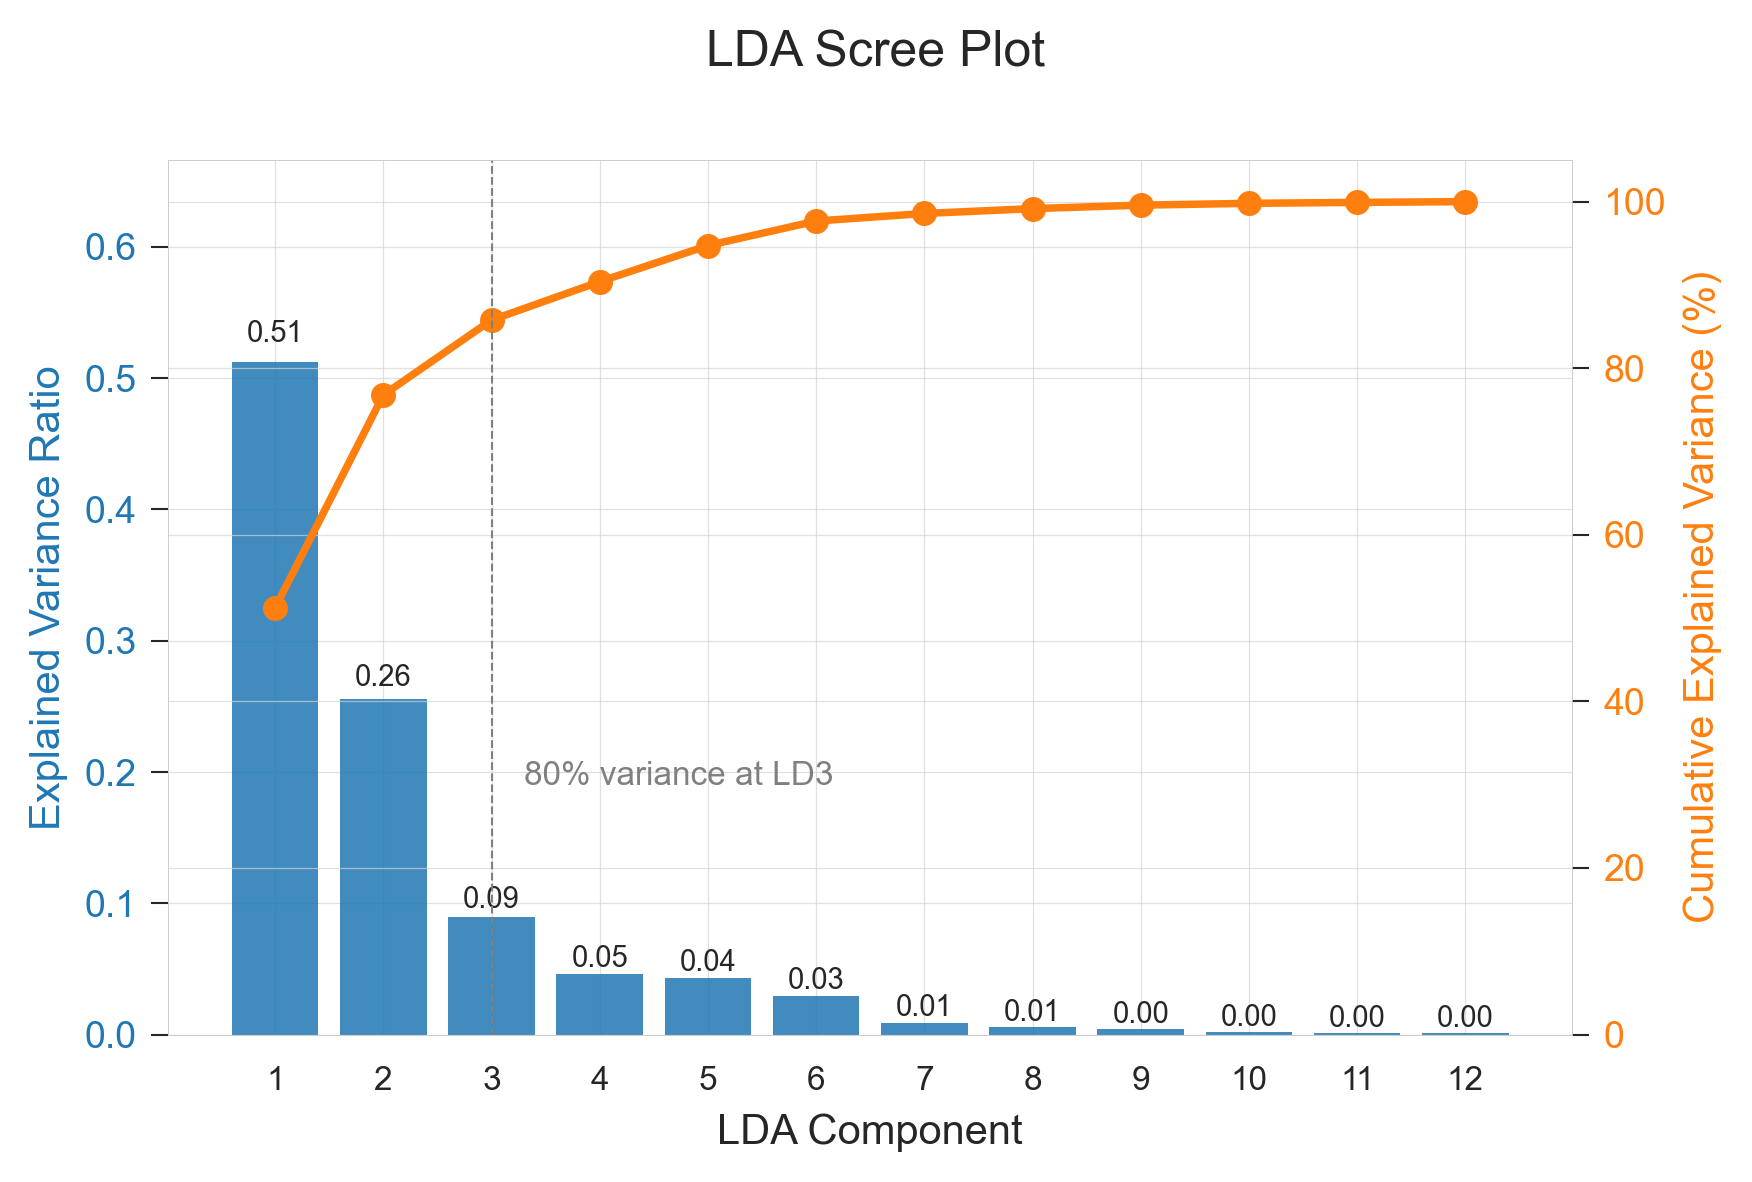

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 explained_var 和 cum_var 已经由 LDA fit 得到
explained_var = lda.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
ld_indices = np.arange(1, len(explained_var)+1)

fig, ax1 = plt.subplots(figsize=(6,4))

# ------------------- 左轴：柱状图 -------------------
bars = ax1.bar(ld_indices, explained_var, color="#1f77b4", alpha=0.85,
               edgecolor='k', linewidth=0, label="Individual LD")
ax1.set_xlabel("LDA Component", fontsize=10)
ax1.set_ylabel("Explained Variance Ratio", fontsize=10, color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", labelsize=9, width=0.5, length=4)
ax1.tick_params(axis='x', width=0.5, length=4)
ax1.set_xticks(ld_indices)
ax1.set_ylim(0, max(explained_var)*1.3)

# 柱顶标注每个 LD 的贡献率
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., 1.02*height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=7)

# ------------------- 右轴：累计折线 -------------------
ax2 = ax1.twinx()
ax2.plot(ld_indices, cum_var*100, color="#ff7f0e", marker='o', markersize=5,
         linewidth=1.8, label="Cumulative Explained")
ax2.set_ylabel("Cumulative Explained Variance (%)", fontsize=10, color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", labelsize=9, width=0.5, length=4)
ax2.set_ylim(0, 105)

# 标注达到80%累计解释率的LD
threshold = 80
first_above = np.where(cum_var*100 >= threshold)[0][0] + 1
ax2.axvline(x=first_above, color='grey', linestyle='--', linewidth=0.5)
ax2.text(first_above+0.3, 30, f'{threshold}% variance at LD{first_above}',
         color='grey', fontsize=8)

# ------------------- 坐标轴极细 -------------------
for spine in ax1.spines.values():
    spine.set_linewidth(0.2)
for spine in ax2.spines.values():
    spine.set_linewidth(0.2)

ax1.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)
ax2.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)
# ------------------- 网格和美化 -------------------
fig.suptitle("LDA Scree Plot", fontsize=12)
fig.tight_layout()

# ------------------- 高精度输出 -------------------
plt.savefig("Fig2a_LDA_scree_Nature_Final.pdf", dpi=300)
plt.show()


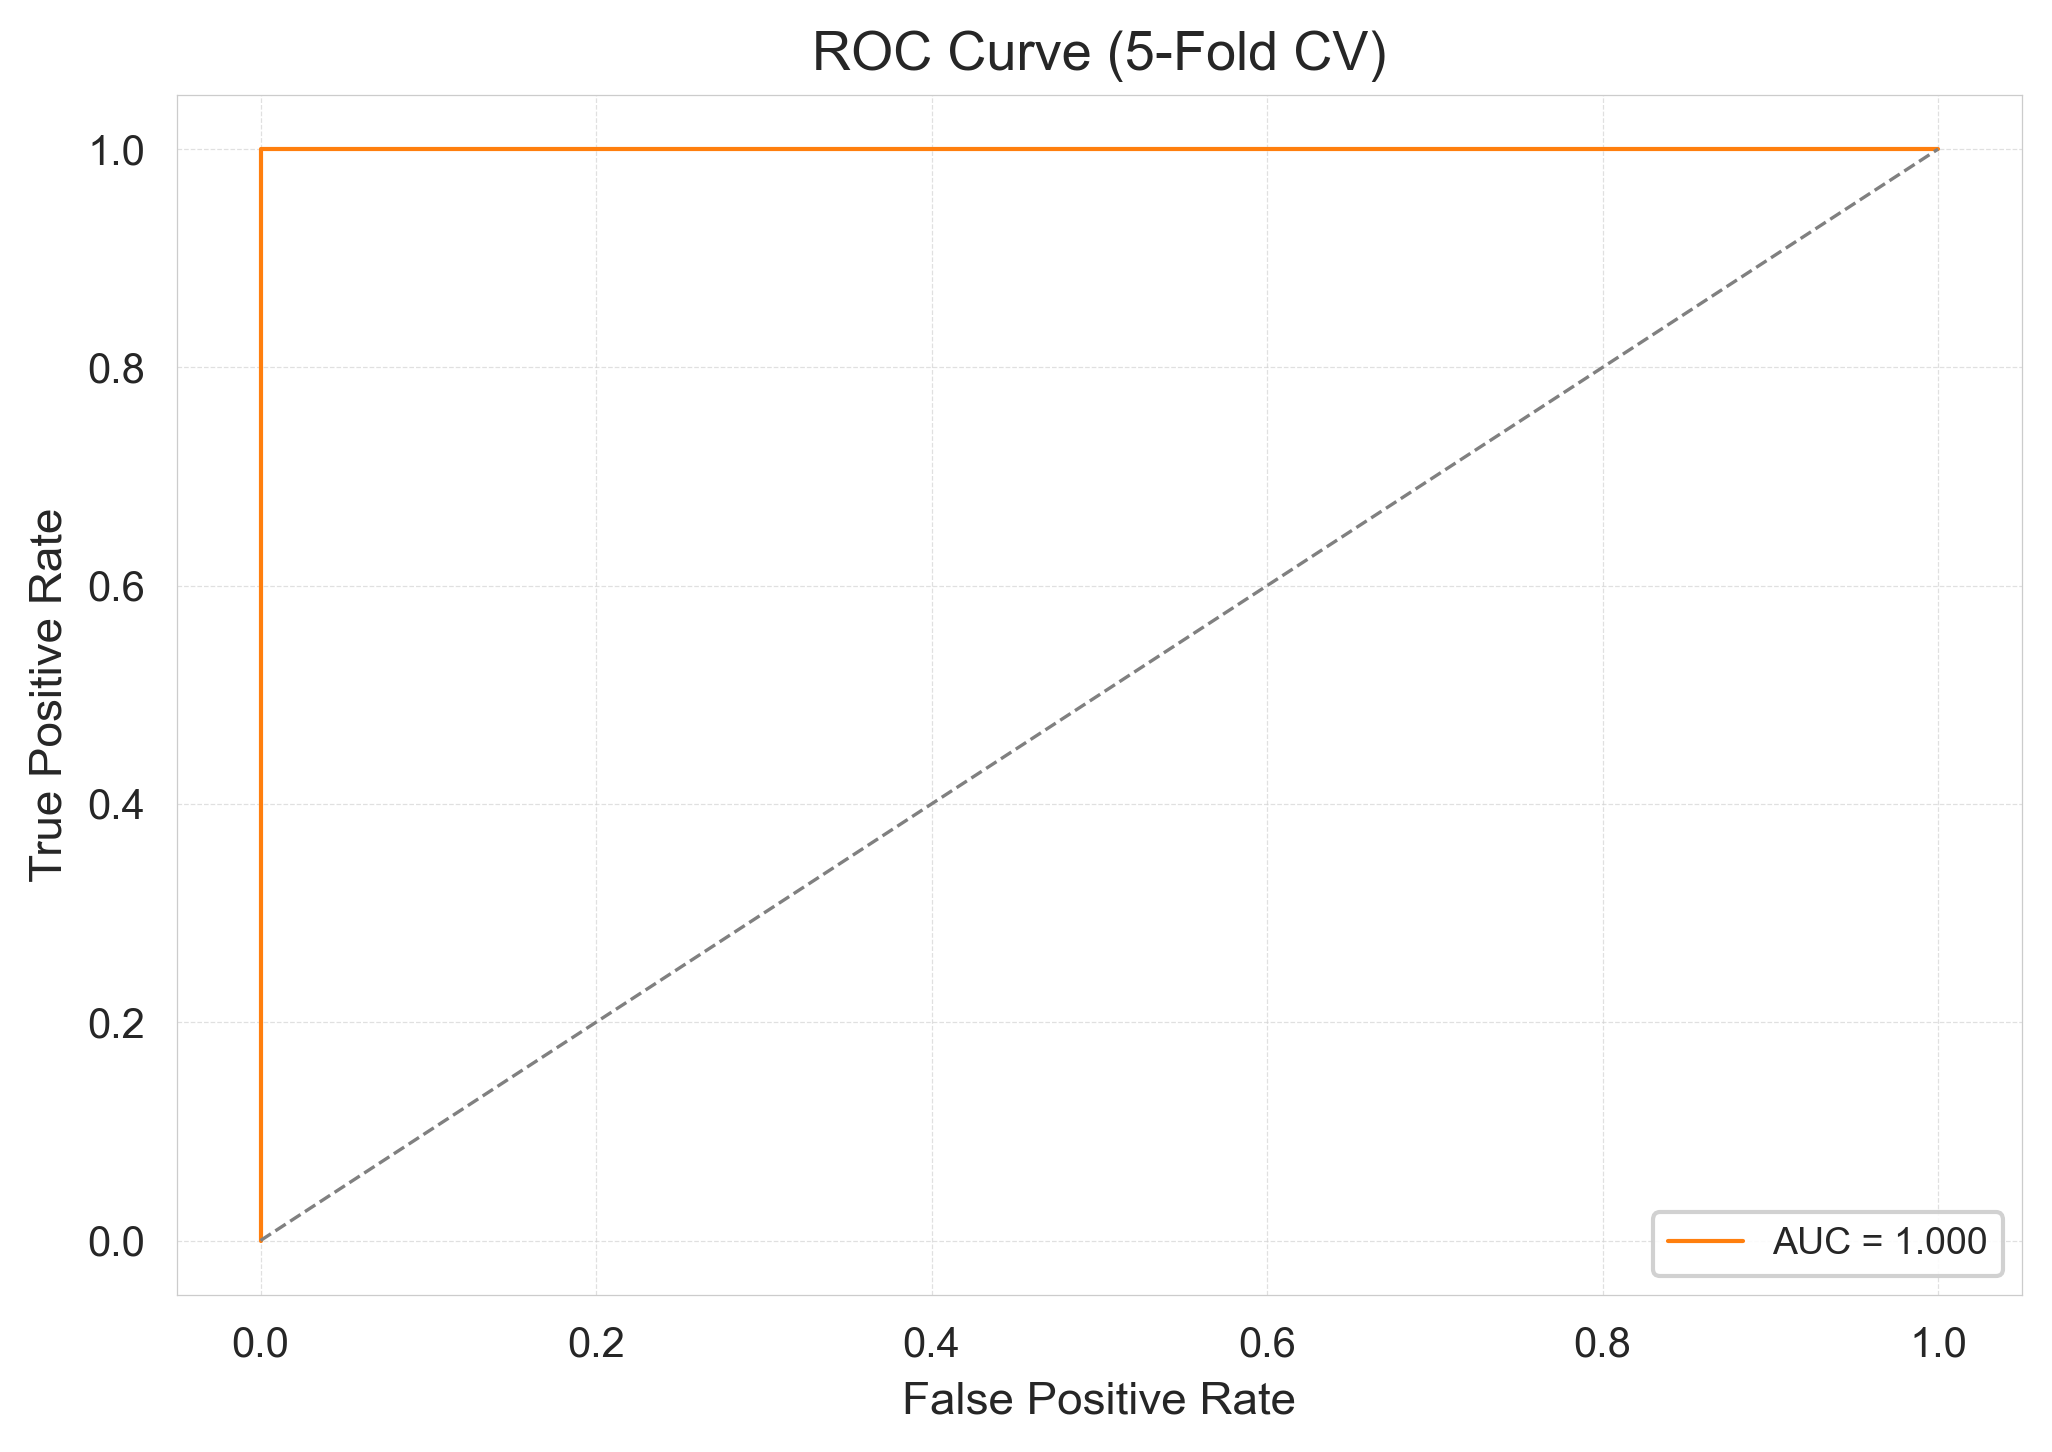

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# ===================== 自定义颜色 =====================
custom_colors = ["#ff7f0e"]  # 单条曲线使用蓝色

# ===================== 二值化标签 =====================
y_true_bin = label_binarize(y_true_all, classes=np.arange(n_classes))

# ===================== 整体 ROC =====================
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob_all.ravel())
roc_auc = auc(fpr, tpr)

# ===================== 绘图 =====================
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr, tpr, color=custom_colors[0], lw=1.0, label=f"AUC = {roc_auc:.3f}")
ax.plot([0,1], [0,1], '--', color='grey', lw=0.8)

# 坐标轴、标题、网格
ax.set_xlabel("False Positive Rate", fontsize=11)
ax.set_ylabel("True Positive Rate", fontsize=11)
ax.set_title("ROC Curve (5-Fold CV)", fontsize=13)
ax.tick_params(axis='both', labelsize=10, width=0.5, length=4)
ax.grid(linestyle='--', alpha=0.5, color='lightgray', linewidth=0.3)

# 极细坐标轴
for spine in ax.spines.values():
    spine.set_linewidth(0.3)

ax.legend(fontsize=9, loc="lower right", frameon=True, framealpha=0.9)

ax.grid(
         linestyle='--', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)

plt.tight_layout()
plt.savefig("Fig2b_ROC_Professional.pdf", dpi=300)
plt.show()


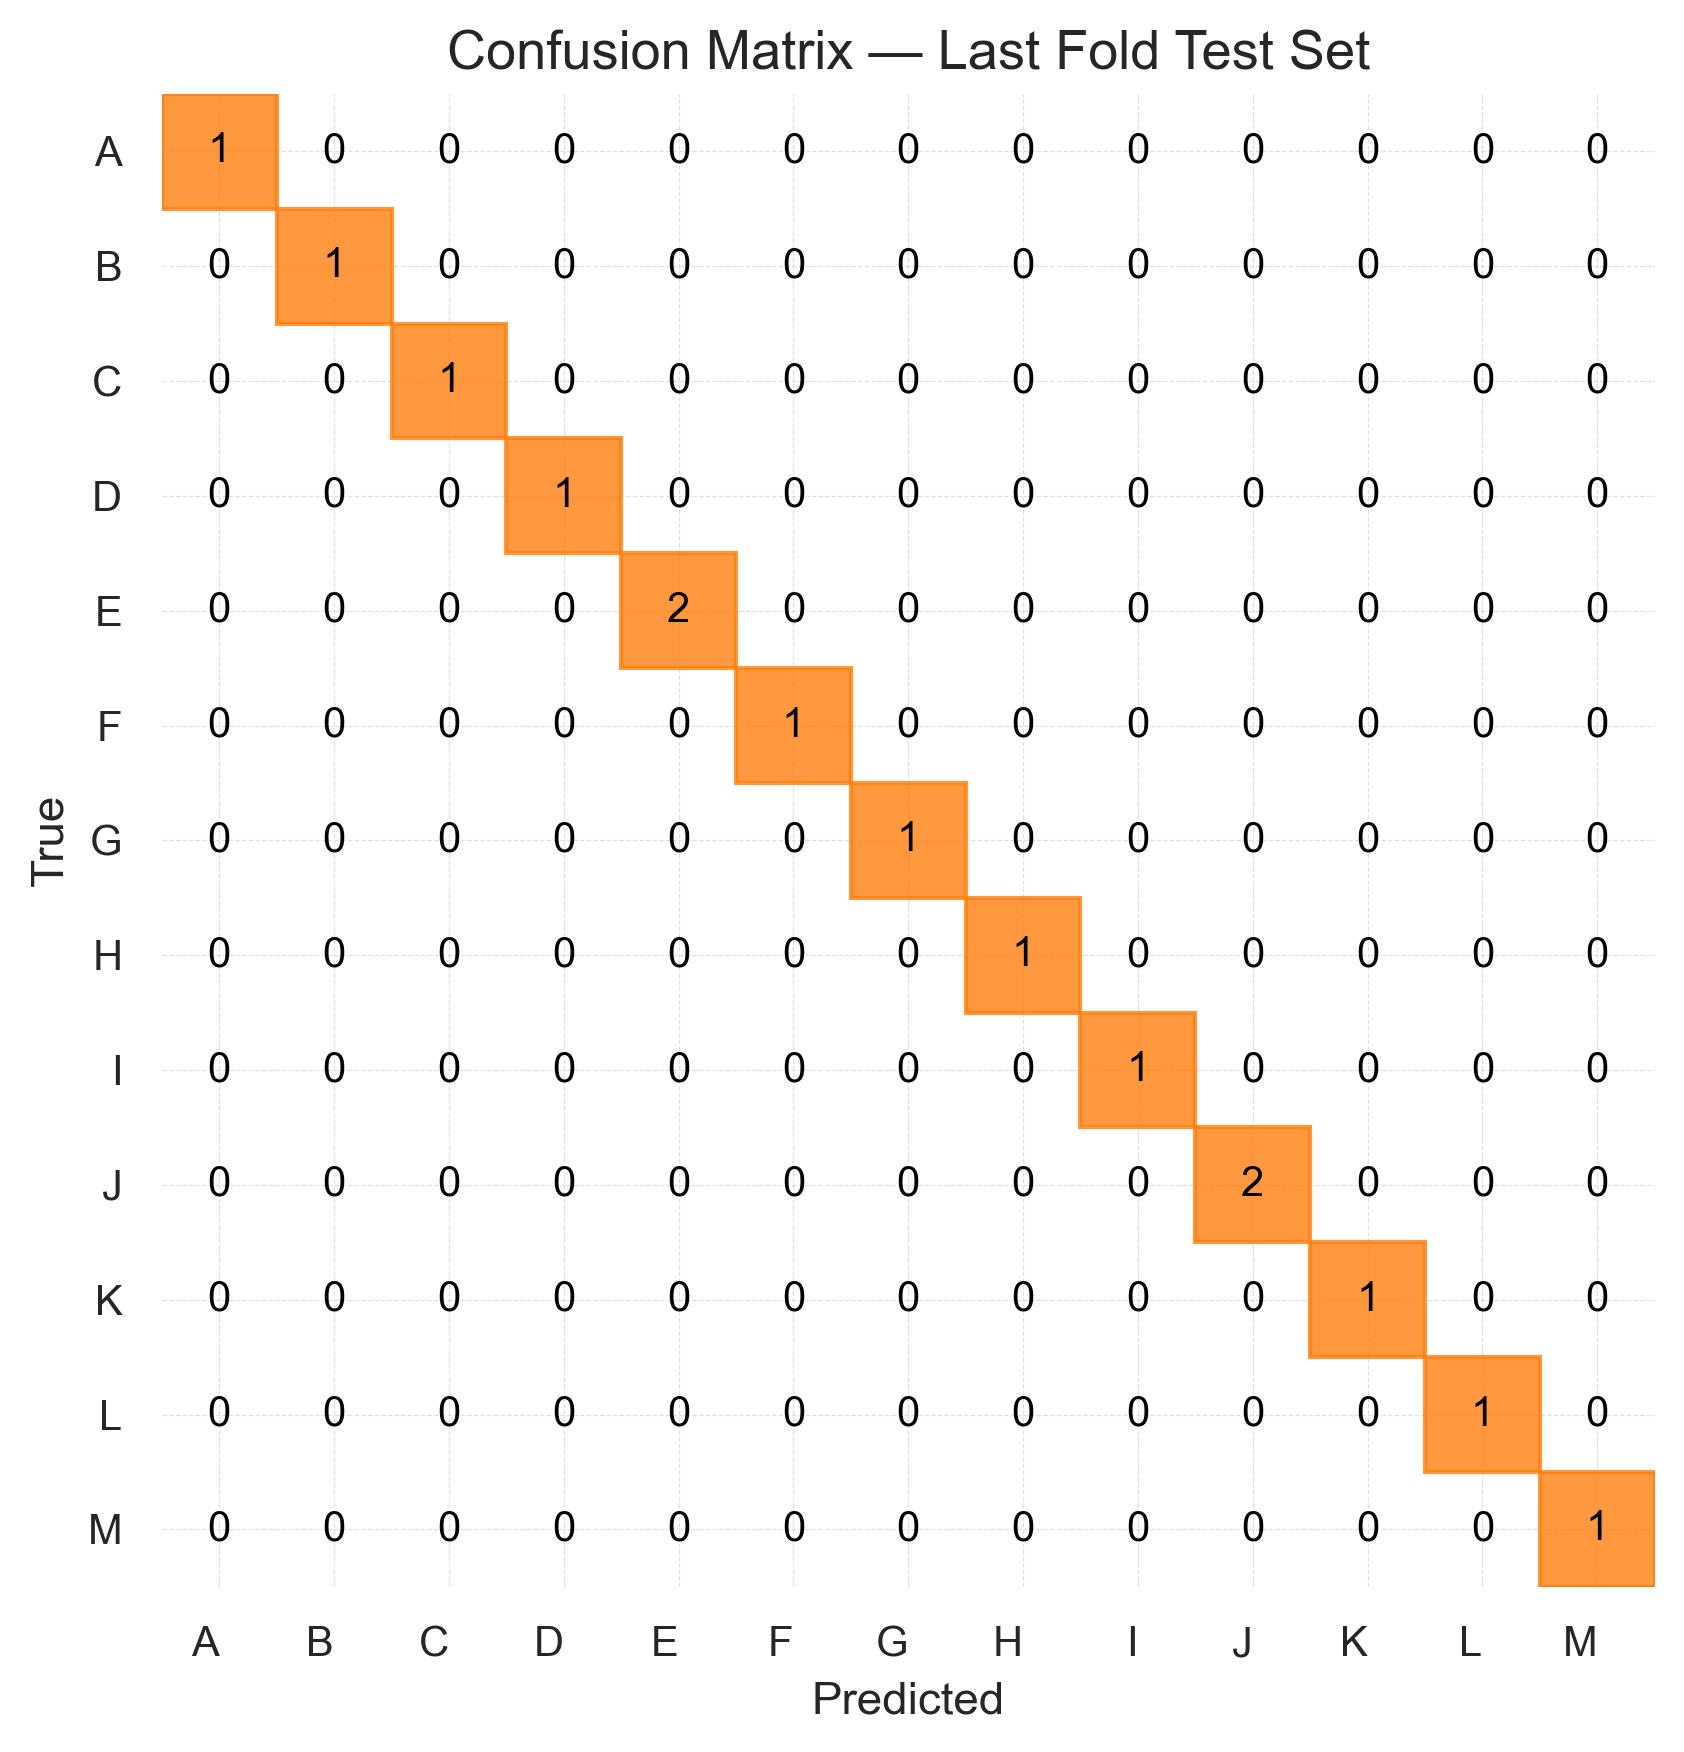

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# ===================== 获取最后一折测试集结果 =====================
# X_test, y_test, y_pred 是循环中最后一折的值
# 如果你希望展示特定折，可改成对应索引
cm = confusion_matrix(y_test, y_pred)
n_classes = cm.shape[0]

# ===================== 绘图 =====================
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("white")
diag_color = "#ff7f0e"  # 对角线颜色

# 绘制对角线矩形
for i in range(n_classes):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color=diag_color, alpha=0.8))

# 添加绝对值注释
for i in range(n_classes):
    for j in range(n_classes):
        ax.text(j+0.5, i+0.5, str(cm[i,j]),
                ha='center', va='center', fontsize=10, color='black')

# 设置刻度和标签
ax.set_xticks(np.arange(n_classes)+0.5)
ax.set_yticks(np.arange(n_classes)+0.5)
ax.set_xticklabels(class_names, ha='right', fontsize=10)
ax.set_yticklabels(class_names, fontsize=10)

# 坐标轴和标题
ax.set_xlabel("Predicted", fontsize=11)
ax.set_ylabel("True", fontsize=11)
ax.set_title("Confusion Matrix — Last Fold Test Set", fontsize=13)

# 隐藏边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlim(0, n_classes)
ax.set_ylim(0, n_classes)
ax.invert_yaxis()
ax.set_aspect('equal')

ax.grid(
         linestyle='--', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)

plt.tight_layout()
plt.savefig("ConfusionMatrix_TestSet.pdf", dpi=300)
plt.show()
